# plant.Watering Prediction Model

## Problem Statement
We should predict the water consumption according to weather data

## Import all libraries

In [122]:
# Show Plot immedeately
%matplotlib inline 

from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import pymysql.cursors
import pandas as pd
from datetime import datetime
from sklearn import linear_model

## Import DataSet

In [123]:
r_DataSet = pd.read_csv("plant.Watering.data/DataSet.csv")

r_DataSet

,Date,Value,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_sum,sre000b0_sum,fu3010b0_mean,prestab0_mean
0,2014-05-27,960.000,12.4,89.0,0.0,0.0,7.2,958.2,15.733333,69.400000,1.207368e-14,306.0,8.937500,957.695833
1,2014-06-01,960.000,5.8,62.6,0.0,0.0,12.2,957.5,3.600000,87.266667,7.900000e+00,90.0,6.595833,954.495833
2,2014-06-02,12.000,5.4,64.5,0.0,0.0,4.7,948.2,2.495833,90.637500,5.000000e-01,1.0,6.779167,947.650000
3,2014-06-05,480.000,17.0,43.3,0.0,0.0,16.2,958.9,11.329167,66.387500,1.215694e-14,760.0,5.066667,959.604167
4,2014-06-06,480.000,23.3,48.2,0.0,52.0,3.2,959.2,14.950000,65.329167,1.160183e-14,718.0,6.554167,959.183333
5,2014-06-08,480.000,20.4,63.1,0.0,0.0,5.8,959.9,18.062500,78.225000,2.000000e+00,255.0,5.779167,962.829167
6,2014-06-09,480.000,18.9,73.6,0.0,0.0,6.5,956.9,17.712500,84.508333,1.200000e+00,174.0,2.625000,958.900000
7,2014-06-10,480.000,13.5,88.5,0.0,0.0,9.4,955.1,14.662500,85.537500,1.290000e+01,563.0,4.979167,958.700000
8,2014-06-11,480.000,4.9,87.7,0.0,0.0,2.5,957.4,4.179167,92.216667,5.100000e+01,0.0,6.820833,948.075000
9,2014-06-12,480.000,3.5,83.1,0.0,0.0,9.0,963.0,3.400000,92.287500,1.000000e-01,0.0,4.229167,959.537500


## Variables

Variable | Description
------------- |-------------|
Date          |   29 non-null object
Value         |   Pump Duration (predicted variable)29 non-null float64
Time          |   29 non-null object
DateTime_x    |   29 non-null object
DateTime_y    |   29 non-null object
tre200b0      |   Lufttemperatur 2 m über Boden; Stundenmittel 24h ago °C (tre200b0)
ure200b0      |   Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel 24h ago % (ure200b0)
rre150b0      |   Niederschlag; Stundensumme 24h ago mm (rre150b0)
sre000b0      |   Sonnenscheindauer; Stundensumme 24h ago min (sre000b0)
fu3010b0      |   Windgeschwindigkeit skalar; Stundenmittel 24h ago km/h (fu3010b0)
prestab0      |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)
tre200b0_mean |   24h-Mean Lufttemperatur 2 m über Boden; Stundenmittel (from -48h to -24h) °C (tre200b0)
ure200b0_mean |  24h-Mean Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel (from -48h to -24h) % (ure200b0)
rre150b0_sum  |   24h-Summe Niederschlag; Stundensumme (from -48h to -24h) mm (rre150b0)
sre000b0_sum  |  24h-Summe Sonnenscheindauer; Stundensumme (from -48h to -24h) min (sre000b0)
fu3010b0_mean |   24h-Mean Windgeschwindigkeit skalar; Stundenmittel (from -48h to -24h) km/h (fu3010b0)
prestab0_mean |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)

In [124]:
# Print more than one variable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

r_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
Date             94 non-null object
Value            94 non-null float64
tre200b0         94 non-null float64
ure200b0         94 non-null float64
rre150b0         94 non-null float64
sre000b0         94 non-null float64
fu3010b0         94 non-null float64
prestab0         94 non-null float64
tre200b0_mean    94 non-null float64
ure200b0_mean    94 non-null float64
rre150b0_sum     94 non-null float64
sre000b0_sum     94 non-null float64
fu3010b0_mean    94 non-null float64
prestab0_mean    94 non-null float64
dtypes: float64(13), object(1)
memory usage: 10.4+ KB


## Lineares Model

In [125]:
#r_DataSet = r_DataSet[(r_DataSet.Value > 100) & (r_DataSet.Value != 480) & (r_DataSet.Value < 800)]
r_DataSet = r_DataSet[(r_DataSet.Value > 100) & (r_DataSet.Value < 600) & (r_DataSet.Value != 480)]
#r_DataSet = r_DataSet[(r_DataSet.Value < 100)]
#r_DataSet = r_DataSet[(r_DataSet.Value > 600)]

#r_DataSet.info()
#r_DataSet.describe()

r_DataSet.describe()

,Value,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_sum,sre000b0_sum,fu3010b0_mean,prestab0_mean
count,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01,32.00000,32.000000,32.000000
mean,372.118719,17.83750,71.065625,0.100000,6.562500,8.046875,960.206250,16.621484,74.034505,2.959375e+00,446.56250,5.926302,961.742188
std,147.802390,6.62735,11.395998,0.495789,15.203857,5.450006,6.418569,5.817670,7.345377,8.444042e+00,304.42902,1.829503,5.201660
min,109.288000,2.30000,46.500000,0.000000,0.000000,1.400000,938.800000,1.479167,60.012500,1.160183e-14,0.00000,3.537500,951.408333
25%,274.020000,14.35000,64.400000,0.000000,0.000000,4.925000,957.100000,15.650000,69.920833,6.634970e-14,157.50000,4.472917,959.119792
50%,354.664500,20.90000,70.550000,0.000000,0.000000,6.650000,960.900000,18.358333,74.304167,7.113754e-14,416.00000,5.622917,961.812500
75%,508.842750,22.57500,78.775000,0.000000,3.250000,10.400000,963.975000,20.900000,78.062500,3.000000e-01,747.50000,7.167708,965.390625
max,596.706000,25.70000,89.700000,2.800000,60.000000,31.000000,972.300000,22.600000,91.633333,3.840000e+01,830.00000,11.200000,971.366667


### Divide DataSet into TrainingSet (60%) and TestSet (100%) and Define Training Variable (y) and Explanation Variables (X)

In [126]:
p_TrainSet = r_DataSet.sample(frac=0.6, replace=True) #60% of Data
p_TestSet = r_DataSet.sample(frac=1, replace=True) #100% of Data

Xtrain = p_TrainSet.loc[:,"tre200b0":]

yTrain = p_TrainSet.Value
yTest = p_TestSet.Value

# Test Model, get X and y from TestSet
Xtest = p_TestSet.loc[:,"tre200b0":]

### Poly Features

In [127]:
from sklearn.preprocessing import PolynomialFeatures
polyDegree = 5
Xtrain = PolynomialFeatures(degree=polyDegree).fit_transform(Xtrain).astype(int)
Xtest = PolynomialFeatures(degree=polyDegree).fit_transform(Xtest).astype(int)

### Train Linear Regression and Set Train Variables

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error: 0.00
Variance score: 1.00


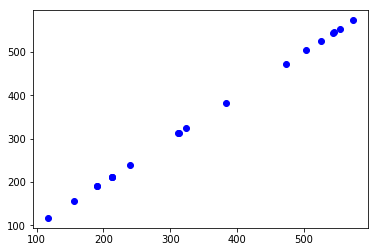

In [128]:
regr = linear_model.LinearRegression()
regr.fit(Xtrain, yTrain)

# The coefficients
#print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtrain) - yTrain) ** 2) ** 0.5)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Xtrain, yTrain))

# Plot outputs
plt.scatter(yTrain, regr.predict(Xtrain), color='blue')

plt.show()

Variance score: -2.09


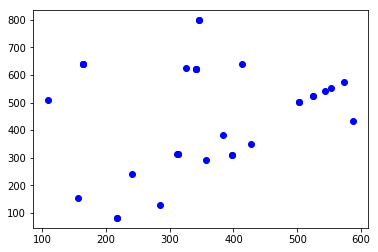

In [129]:
from sklearn.externals import joblib
#joblib.dump(regr, 'lr_medium_values.pkl', compress=9)

model_clone = regr
#model_clone = joblib.load('lr_medium_values.pkl')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_clone.score(Xtest, yTest))
plt.scatter(yTest, model_clone.predict(Xtest), color='blue')
plt.show()

In [130]:
#Save the model
#joblib.dump(regr, 'plant.Watering.data/linreg_med_5deg.pkl')

#### Port your model to other languages
Very good source for porting pkl (Pickle) Files to other langauges
https://github.com/nok/sklearn-porter